# 9/1 - Korreláció elemezés

1. Adathalmaz beolvasása
2. Szórásdiagram (scattorplot) grafikon készítése
3. Korreláció meghatározása
4. Korreláció vizualizálása

A statisztikában a korreláció jelzi két tetszőleges érték közötti lineáris kapcsolat nagyságát és irányát (tehát az értékek egymáshoz való viszonyát). A korrelációs együttható egy -1 és 1 közti szám. Minél nagyobb az együttható a két adat annál erősebb kapcsolat van a két adat között.

## Adathalmaz beolvasása

You will use a dataset that contains a sample of 40 right-handed Anglo Introductory Psychology students at a large Southwestern university. Subjects took four subtests (Vocabulary, Similarities, Block Design, and Picture Completion) of the Wechsler (1981) Adult Intelligence Scale-Revised. The researchers used Magnetic Resonance Imaging (MRI) to determine the brain size of the subjects. Information about gender and body size (height and weight) are also included. The researchers withheld the weights of two subjects and the height of one subject for reasons of confidentiality.
Two simple modifications were applied to the dataset:

1. Replace the quesion marks used to represent the withheld data points described above by the 'NaN' string. The substitution was done because Pandas does not handle the question marks correctly.

2. Replace all tab characters with commas, converting the dataset into a CSV dataset.

The prepared dataset is saved as `brainsize.txt`.

#### Step 1: Loading the Dataset From a File.

Before the dataset can be used, it must be loaded onto memory.

In the code below, The first line imports the `pandas` modules and defines `pd` as a descriptor that refers to the module.

The second line loads the dataset CSV file into a variable called `brainFile`.

The third line uses `read_csv()`, a `pandas` method, to convert the CSV dataset stored in `brainFile` into a dataframe. The dataframe is then stored in the `brainFrame` variable.

Run the cell below to execute the described functions.

In [3]:
import pandas as pd 
df = pd.read_csv('brainsize.txt')

In [4]:
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


## Part 2: Scatterplot Graphs and Correlatable Variables

A pandas tartalmaz egy `describe()` nevű metódust mely alapvető statisztikai számításokat (darabszám, átlag, szórás, min, max, stb.).

In [5]:
df.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


#### Step 2: Scatterplot graphs

Scatterplot graphs are important when working with correlations as they allow for a quick visual verification of the nature of the relationship between the variables. This lab uses the Pearson correlation coefficient, which is sensitive only to a linear relationship between two variables. Other more robust correlation methods exist but are out of the scope of this lab.

##### a. Load the required modules.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

##### b. Separate the data.
To ensure the results do not get skewed because of the differences in male and female bodies, the dateframe is split into two dataframes: one containing all male entries and another with only female instances. <p>
Running the cell below creates the two new dataframes, menDf and womenDf, each one containing the respective entries.

In [7]:
menDf = df[(df.Gender == 'Male')]
womenDf = df[(df.Gender == 'Female')]

##### c. Plot the graphs.
Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first line below uses Pandas `mean()` method to calculate the mean value between the three and store the result in the `menMeanSmarts` variable. Notice that the first line also refers to the menDf, the filtered dataframe containing only male entries.<p>
The second line uses the `matplotlib` method `scatter()` to create a scatterplot graph between the `menMeanSmarts` variable and the `MRI_Count`attribute. The MRI_Count in this dataset can be thought as of a measure of the physical size of the subjects' brains.<p>
The third line simply displays the graph.<p>
The fourth line is used to ensure the graph will be displayed in this notebook.

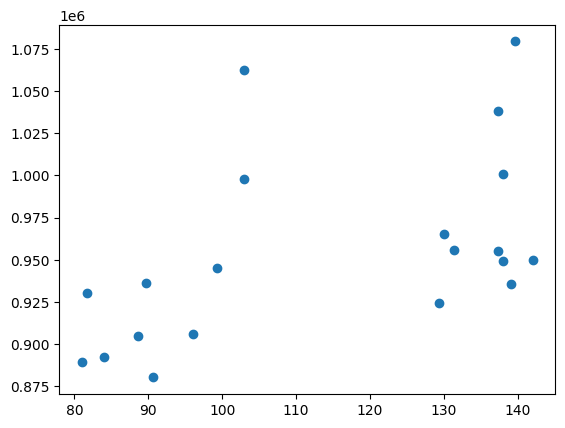

In [8]:
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe.

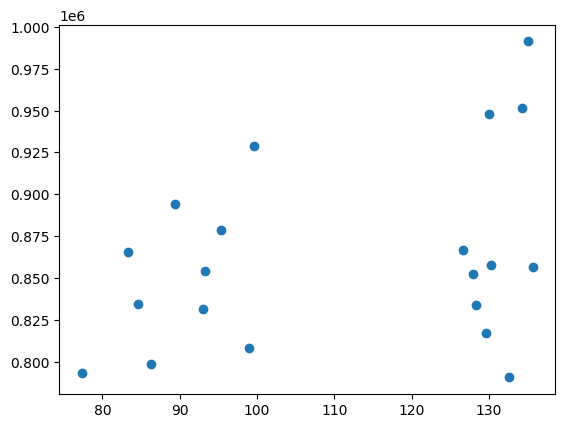

In [9]:
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])

plt.show()
%matplotlib inline

## Part 3: Calculating Correlation with Python


#### Step 1: Calculate correlation against brainFrame.
The pandas `corr()` method provides an easy way to calculate correlation against a dataframe. By simply calling the method against a dataframe, one can get the correlation between all variables at the same time.

In [14]:
a_corr = df.corr(method='pearson', numeric_only=True) # Pearson-féle korreláció
a_corr

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Az átlóban értelemszerűen mindig egyes áll, mivel saját magával nyilván kapcsolatban áll az adat.

Still looking at the correlation table above, notice that the values are mirrored; values below the 1 diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.

Using the same `corr()` method, it is easy to calculate the correlation of the variables contained in the female-only dataframe:

In [15]:
w_corr = womenDf.corr(method='pearson', numeric_only=True)
w_corr

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


In [16]:
m_corr = menDf.corr(method='pearson', numeric_only=True)
m_corr

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


## Vizualizáció

To make it easier to visualize the data correlations, heatmap graphs can be used. Based on colored squares, heatmap graphs can help identify correlations in a glance.

The Python module named `seaborn` makes it very easy to plot heatmap graphs.

In [13]:
import seaborn as sns

A `seaborn` `heatmap()` metódusa pontosan a pandas által előállított formátumban várja az korrelációt.

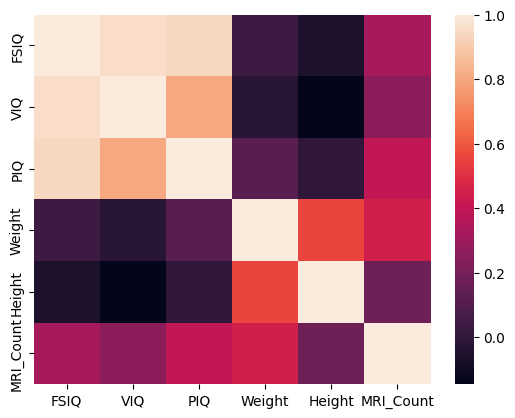

In [28]:
fig = sns.heatmap(w_corr)

A létrejött diagrammot ki is menthetjük.

In [30]:
fig.get_figure().savefig('attribute_correlations.svg', format='svg')

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

<Axes: >

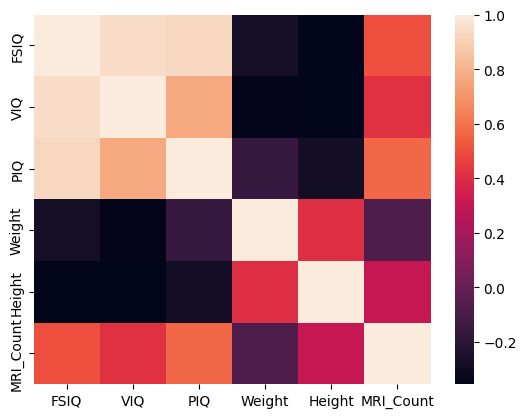

In [22]:
sns.heatmap(m_corr)

op.Many variable pairs present correlation close to zero. What does that mean?

Why separate the genders?

What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.